In [1]:
%reset -f
%matplotlib inline

import sys
import pandas as pd
import numpy as np
import feather
import time
sys.path.append('../../../glmnet_python/lib')

import scipy, importlib, pprint, matplotlib.pyplot as plt, warnings
from glmnet import glmnet; from glmnetPlot import glmnetPlot 
from glmnetPrint import glmnetPrint; from glmnetCoef import glmnetCoef; from glmnetPredict import glmnetPredict
from cvglmnet import cvglmnet; from cvglmnetCoef import cvglmnetCoef
from cvglmnetPlot import cvglmnetPlot; from cvglmnetPredict import cvglmnetPredict

import pogs as pogs


Loaded POGS CPU library

Loaded POGS GPU library.


### Import Data Frame and create raw X and y arrays

In [2]:
t0 = time.time()
df = feather.read_dataframe("ipums.feather") ## created by ../R/ipums_prep.R
t1 = time.time()
print("Time to read data via feather: %r" % (t1-t0))

Time to read data via feather: 4.560060739517212


In [3]:
target = df.columns[-1] ## last column is the response
cols = [c for c in df.columns if c != target]

In [4]:
X = np.array(df.ix[:,cols])
y = df[target].values
print(X.shape)
print(y.shape)

(55776, 9732)
(55776,)


### H2O AI GLM

In [ ]:
import pogs as pogs
import elastic_net as enet

In [ ]:
t0 = time.time()
enet.ElasticNet(X, y, gpu=True, double_precision=True, nlambda=100, alpha=0.5)
t1 = time.time()
print("Time to train H2O AI GLM: %r" % (t1-t0))

### H2O AI GLM using the GPU Pointers

In [ ]:
gpu_ptr_X, gpu_ptr_y = upload_to_gpu(X, y, w_dev)
h2oglm = H2OAIGLM(valid_fraction=0.2, alpha=[0,0.1,0.2], lambda_search=True, nGPUs=8)
h2oglm.fit(gpu_ptr_X, gpu_ptr_y, w_dev)

### GLMNET

In [5]:
#glmnet expects scipy arrays
Xscipy = scipy.array(X, dtype='float64')
yscipy = scipy.array(y, dtype='float64')

In [9]:
t0 = time.time()
fit = glmnet(x=Xscipy, y=yscipy, family="gaussian", alpha=0.5, nlambda=100)
t1 = time.time()
print("Time to train glmnet: %r" % (t1-t0))

Time to train glmnet: 232.99465537071228


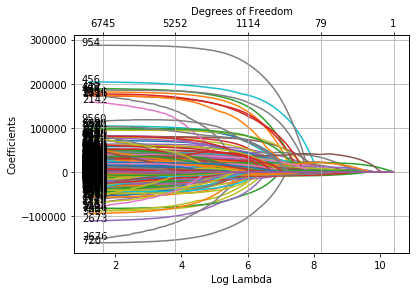

{'ax1': <matplotlib.axes._subplots.AxesSubplot at 0x7fc30fd5bef0>,
 'ax2': <matplotlib.axes._subplots.AxesSubplot at 0x7fbb3b519710>,
 'fig': <matplotlib.figure.Figure at 0x7fc508b94400>}

In [10]:
glmnetPlot(fit, xvar = 'lambda', label = True)